In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
df_edge = pd.read_csv('twitch\FR\musae_FR_edges.csv')
df_target = pd.read_csv('twitch\FR\musae_FR_target.csv')

In [4]:
df_target = df_target[df_target.partner.eq(True)]
df_target = df_target[df_target.mature.eq(False)]

In [5]:
#Caricamento del grafo orientato
nodes = df_target['new_id'].to_list()
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

In [6]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.spring_layout(graph)

### Analisi descrittiva

In [7]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  249
EDGES:  2082
DENSITY:  0.034
CLUSTERING:  0.15106025395718686


In [8]:
nx.clustering(graph)

{98: 0.09523809523809523,
 4719: 0.21693121693121692,
 577: 0.16666666666666666,
 2448: 0.20504201680672268,
 6148: 0.13726884779516357,
 1939: 0.08928571428571429,
 612: 0.07823613086770982,
 1440: 0.13203463203463203,
 421: 0.10144927536231885,
 1548: 0.19090909090909092,
 5708: 0.15151515151515152,
 4047: 0.1865530303030303,
 1261: 0.09523809523809523,
 2496: 0.3333333333333333,
 539: 0.1067193675889328,
 4998: 0.5,
 3920: 0.14393939393939395,
 142: 0.17756410256410257,
 4586: 0.09090909090909091,
 5095: 0.05714285714285714,
 4692: 0.25,
 761: 0.26666666666666666,
 959: 0.16666666666666666,
 5014: 0.20105820105820105,
 3351: 0.15526315789473685,
 5968: 0.10240963855421686,
 554: 0.1631578947368421,
 5034: 0.09080459770114943,
 4292: 0.3333333333333333,
 70: 0.08181818181818182,
 3276: 0.13736263736263737,
 2194: 0.05454545454545454,
 4451: 0.13062409288824384,
 771: 0.07317073170731707,
 5543: 0.10972850678733032,
 5804: 0.10887096774193548,
 431: 0.023809523809523808,
 4179: 0.0666

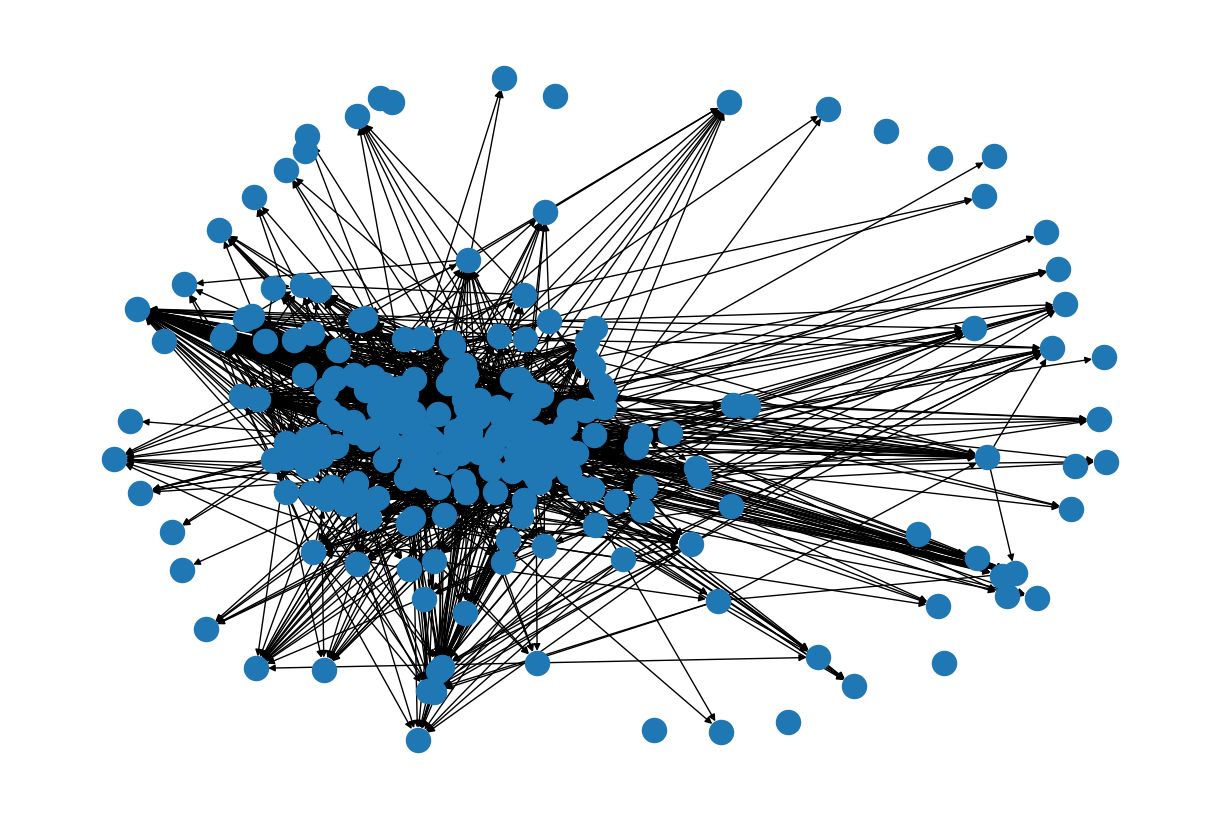

In [9]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<Figure size 1500x1000 with 0 Axes>

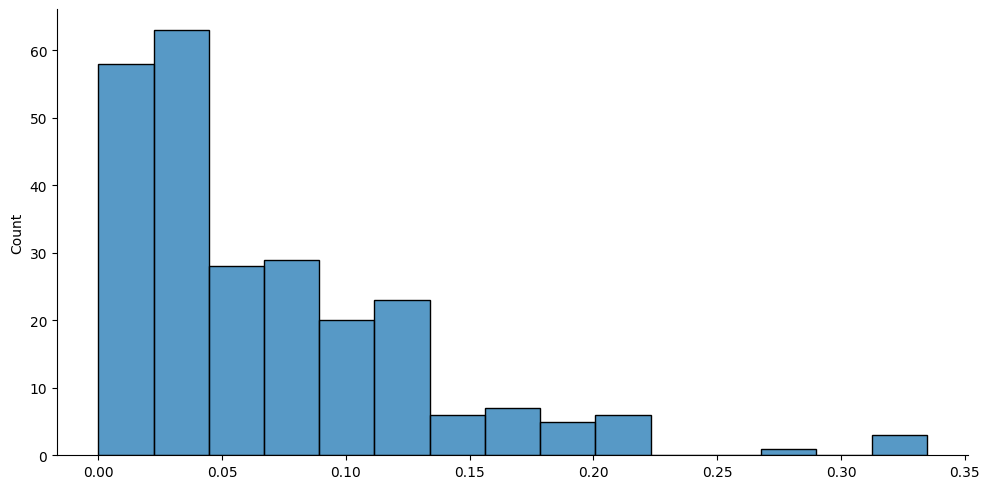

In [9]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=False, aspect = 2)

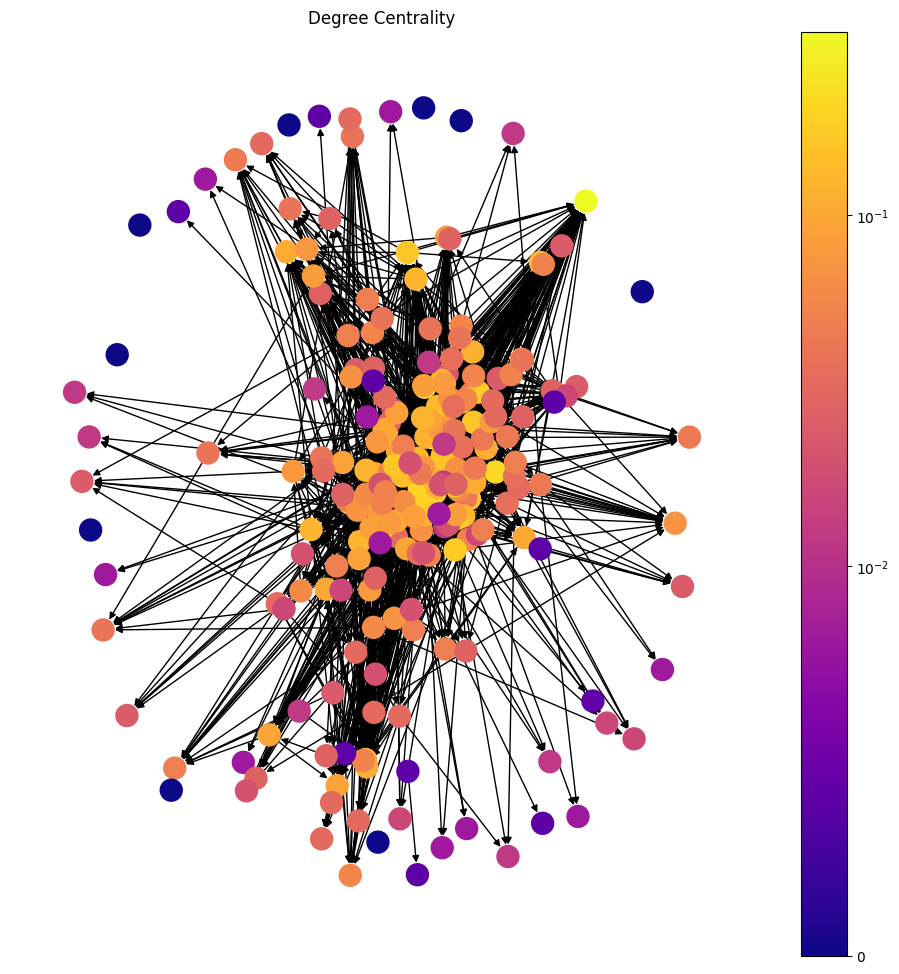

In [11]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

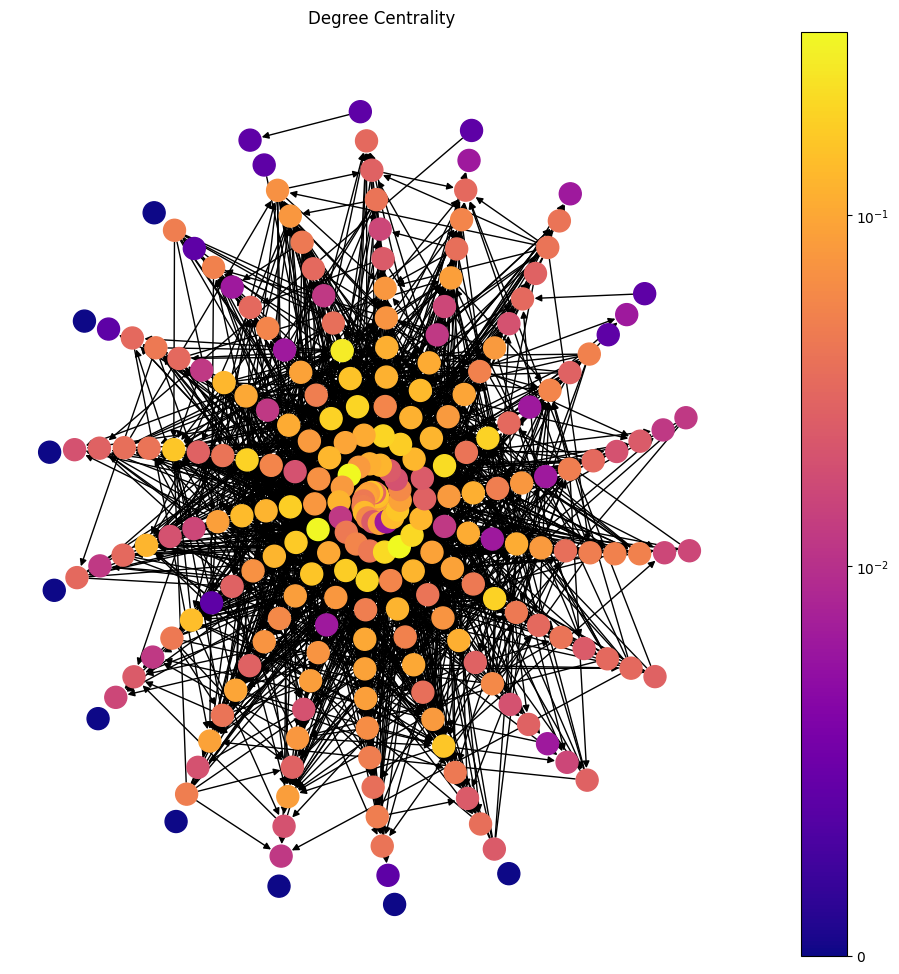

In [12]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Degree Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

<AxesSubplot:>

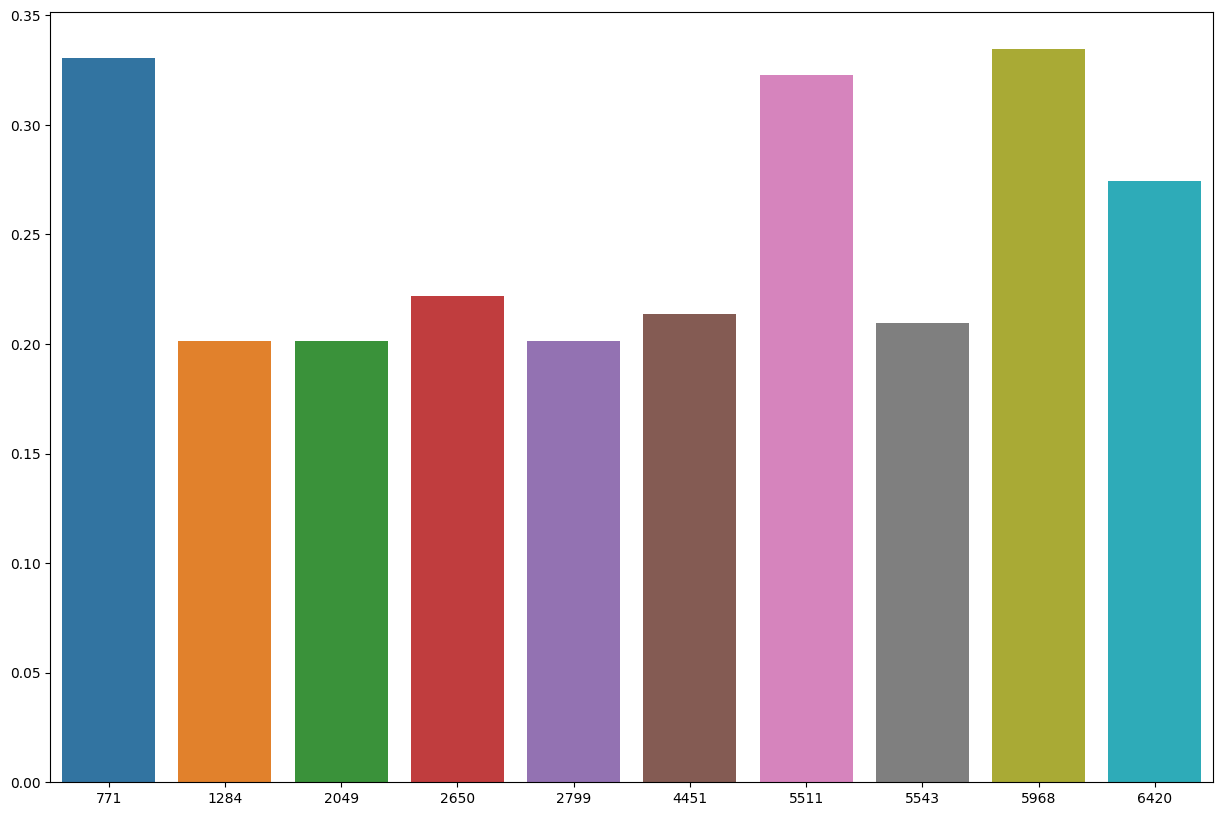

In [13]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in degree.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

{5968: Text(-0.19119285962901397, -0.6168312774250095, '5968'),
 4451: Text(0.029363493851285005, -0.12524215692557106, '4451'),
 771: Text(-0.07103448862159878, 0.06350356590199134, '771'),
 5543: Text(0.09950994523366478, -0.12242013981545764, '5543'),
 2049: Text(0.06587648092572332, -0.07901193801036778, '2049'),
 5511: Text(0.014476900627607812, -0.06318403940422952, '5511'),
 1284: Text(-0.006054245624193556, -0.1459903238039833, '1284'),
 2650: Text(-0.0600642397506766, -0.05439494541127709, '2650'),
 2799: Text(0.0484016146693123, -0.059909675693694514, '2799'),
 6420: Text(-0.07104339807194603, -0.10229609445374949, '6420')}

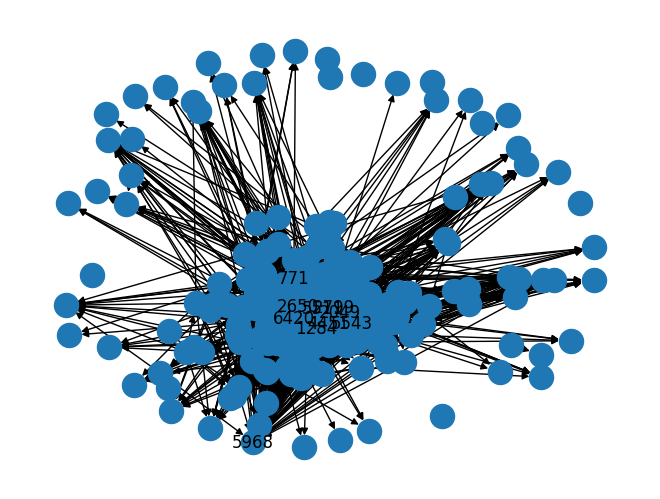

In [10]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in degree.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

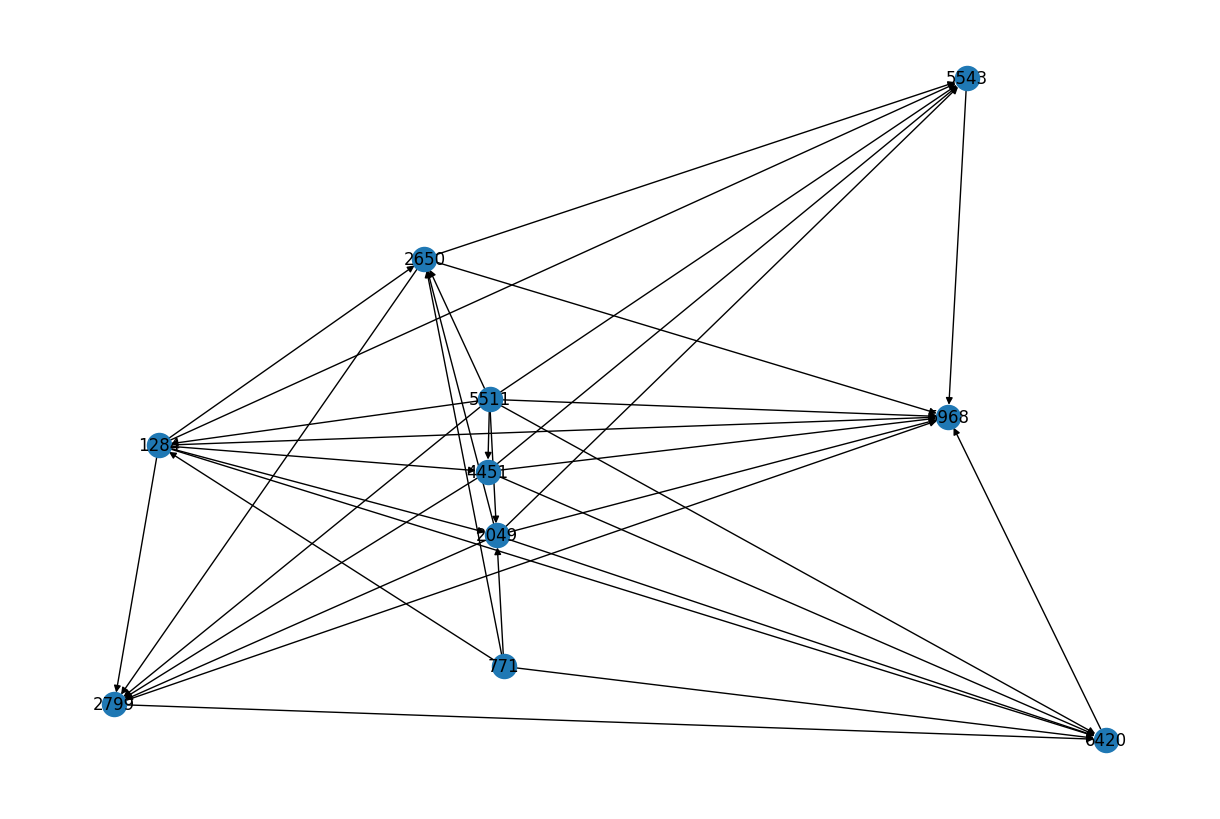

In [11]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_deg = nx.DiGraph()
graph_deg.add_edges_from(edges)
graph_deg.add_nodes_from(nodes)
pos_deg = nx.spring_layout(graph_deg)

plt.figure(figsize=(12,8))
nx.draw(graph_deg, pos_deg, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_deg, pos_deg, labels)
plt.show()

Betweenness Centrality

<Figure size 1500x1000 with 0 Axes>

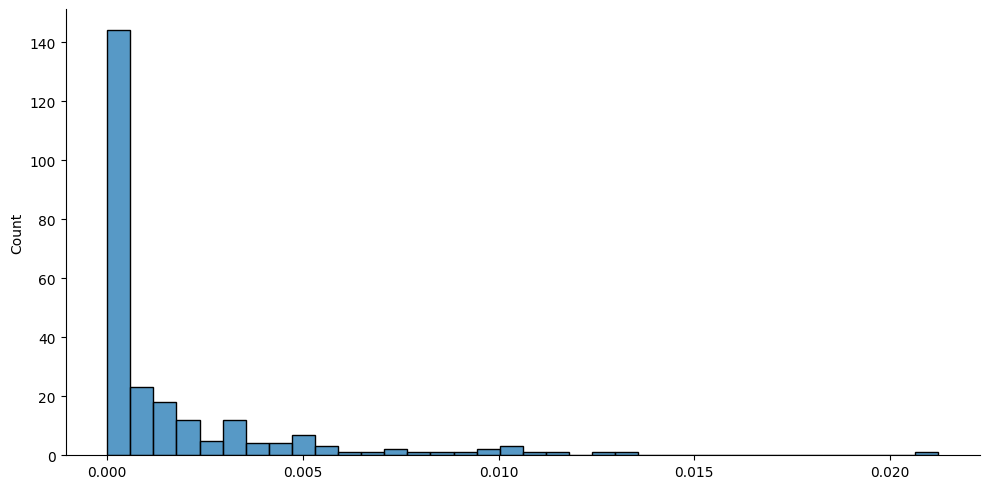

In [12]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()), kde=False, aspect = 2)

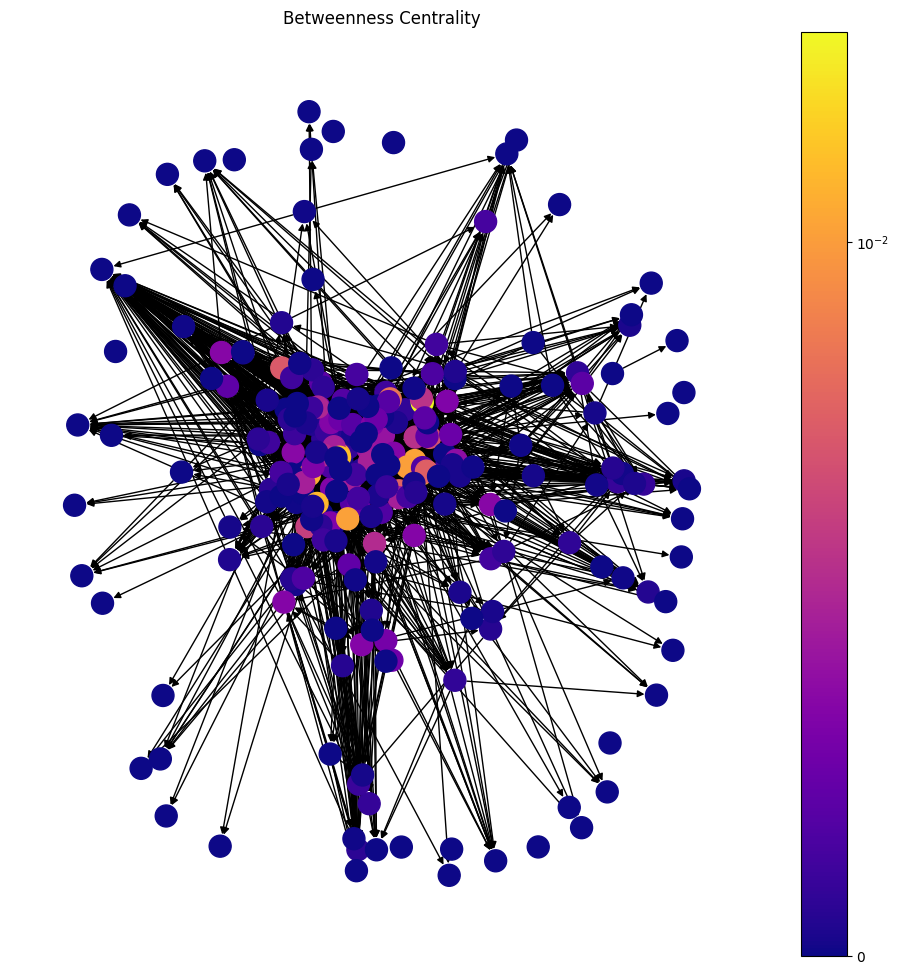

In [16]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

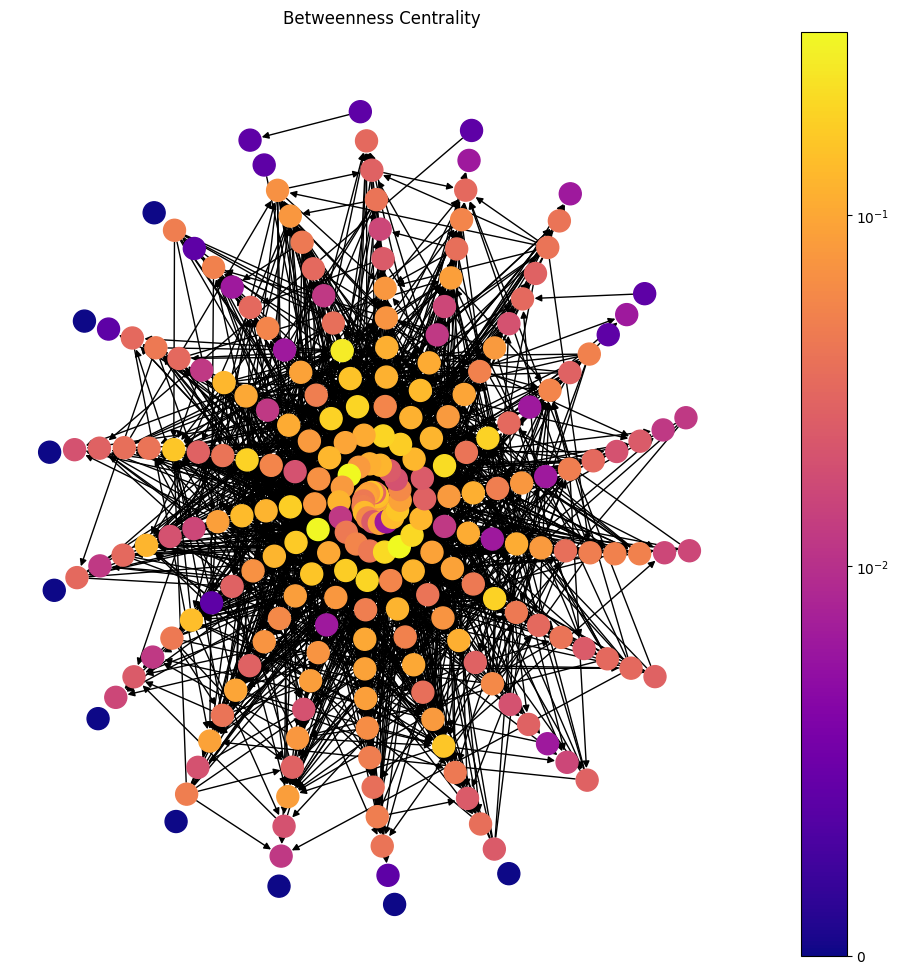

In [17]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Betweenness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{4451: Text(-0.022203676385493445, 0.03573468322162643, '4451'),
 771: Text(0.05246353502287534, 0.08057806729863494, '771'),
 5511: Text(-0.05512025888678597, -0.011211245196002183, '5511'),
 2650: Text(-0.12269738015569921, -0.08409690288120007, '2650'),
 6360: Text(0.06568656114695996, -0.19688227929104157, '6360'),
 4640: Text(-0.30240428253687723, 0.004622712282169268, '4640'),
 6420: Text(0.09935231195918072, -0.006124567354139303, '6420'),
 1825: Text(-0.17029152580201853, -0.0019597103429234205, '1825')}

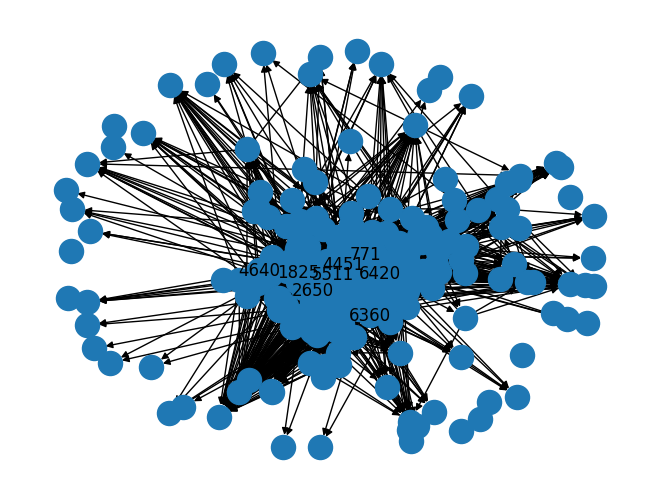

In [13]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in bet.items():
    if value > 0.01: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

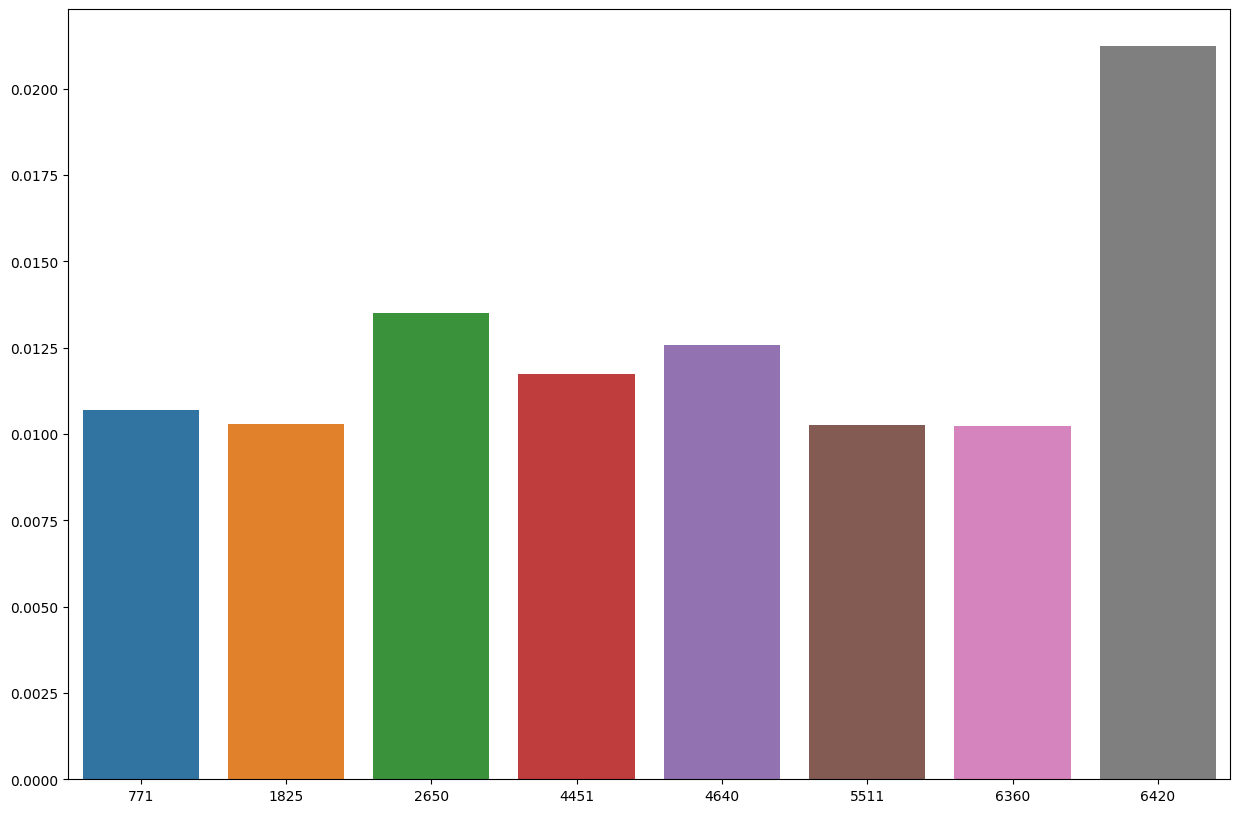

In [19]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in bet.items():
    if value > 0.01: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

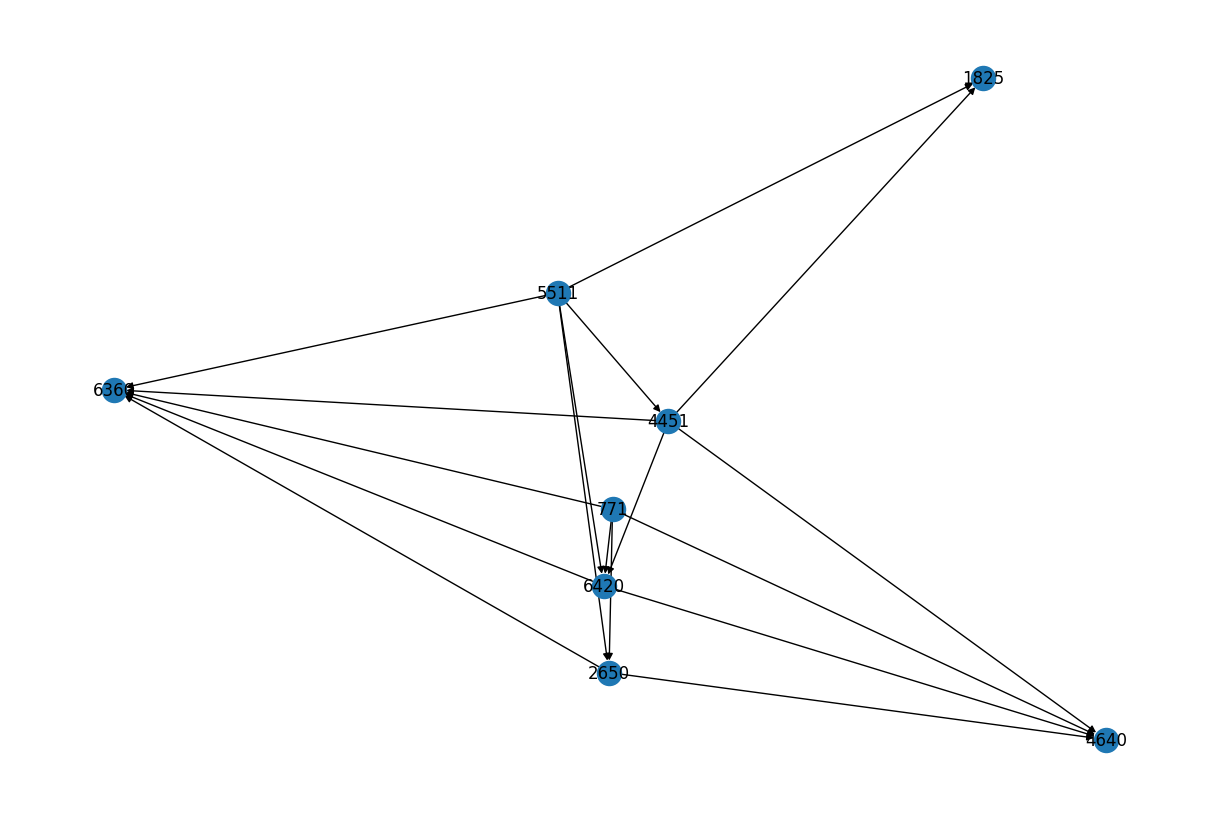

In [14]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_bet = nx.DiGraph()
graph_bet.add_edges_from(edges)
graph_bet.add_nodes_from(nodes)
pos_bet = nx.spring_layout(graph_bet)

plt.figure(figsize=(12,8))
nx.draw(graph_bet, pos_bet, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_bet, pos_bet, labels)
plt.show()

Closeness Centrality

<Figure size 1500x1000 with 0 Axes>

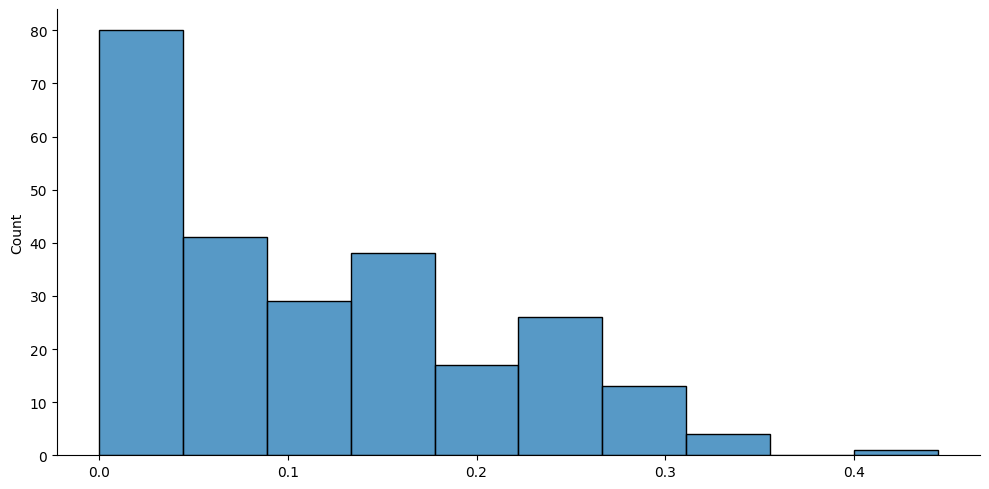

In [15]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(clos.values()), kde=False, aspect = 2)

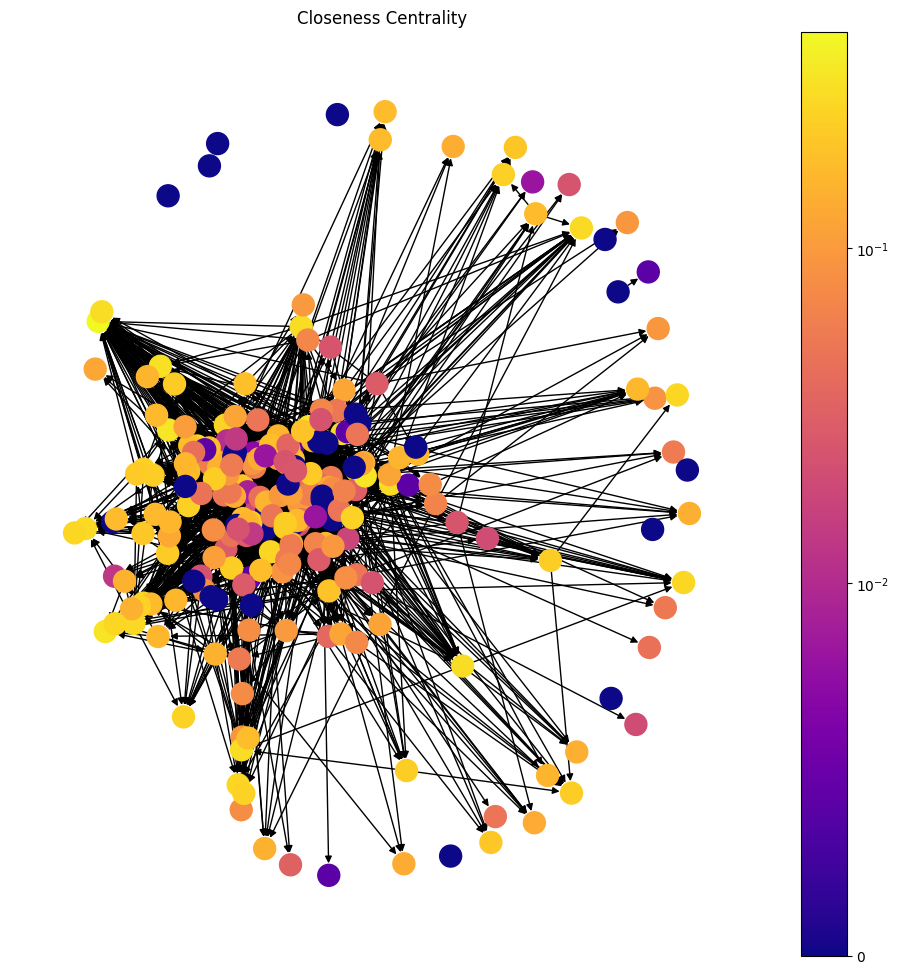

In [21]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

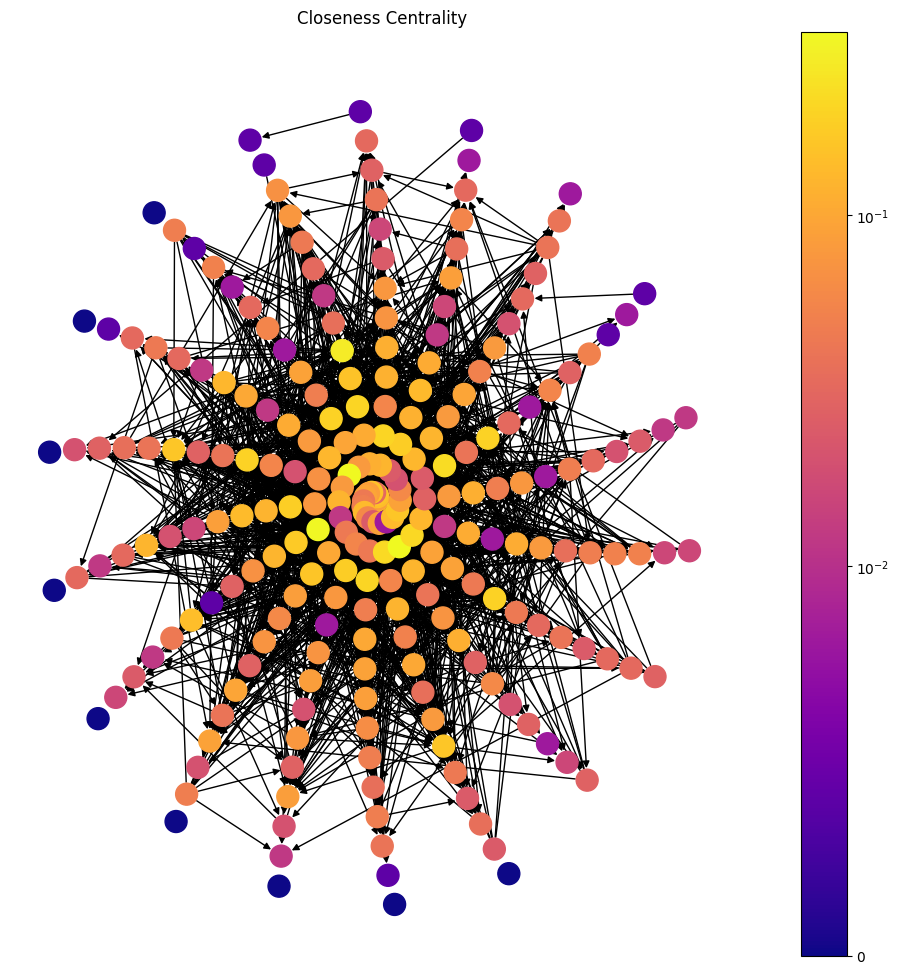

In [22]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Closeness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{5968: Text(0.42962570742888484, -0.8319582288421816, '5968'),
 5543: Text(-0.1295695153852091, -0.1257962142492198, '5543'),
 5804: Text(0.31961816495920803, -0.6102120164086392, '5804'),
 5516: Text(0.37867647844327257, -0.17748697247348724, '5516'),
 6271: Text(-0.42196591100779524, 0.6884556348366949, '6271'),
 5554: Text(-0.07902235571667261, -0.48500865334346066, '5554')}

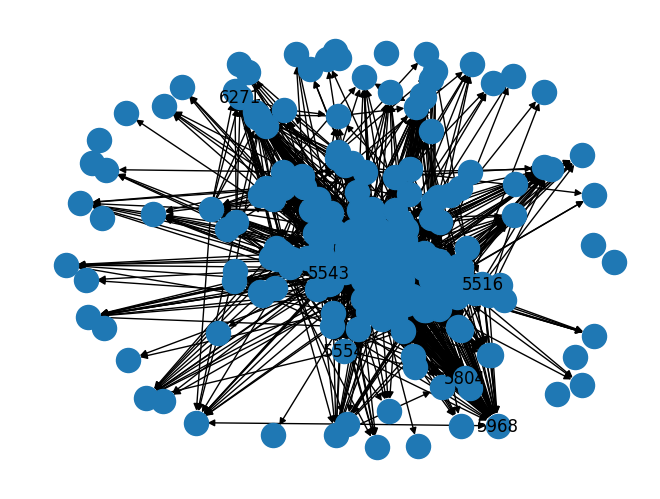

In [16]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in clos.items():
    if value > 0.3: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

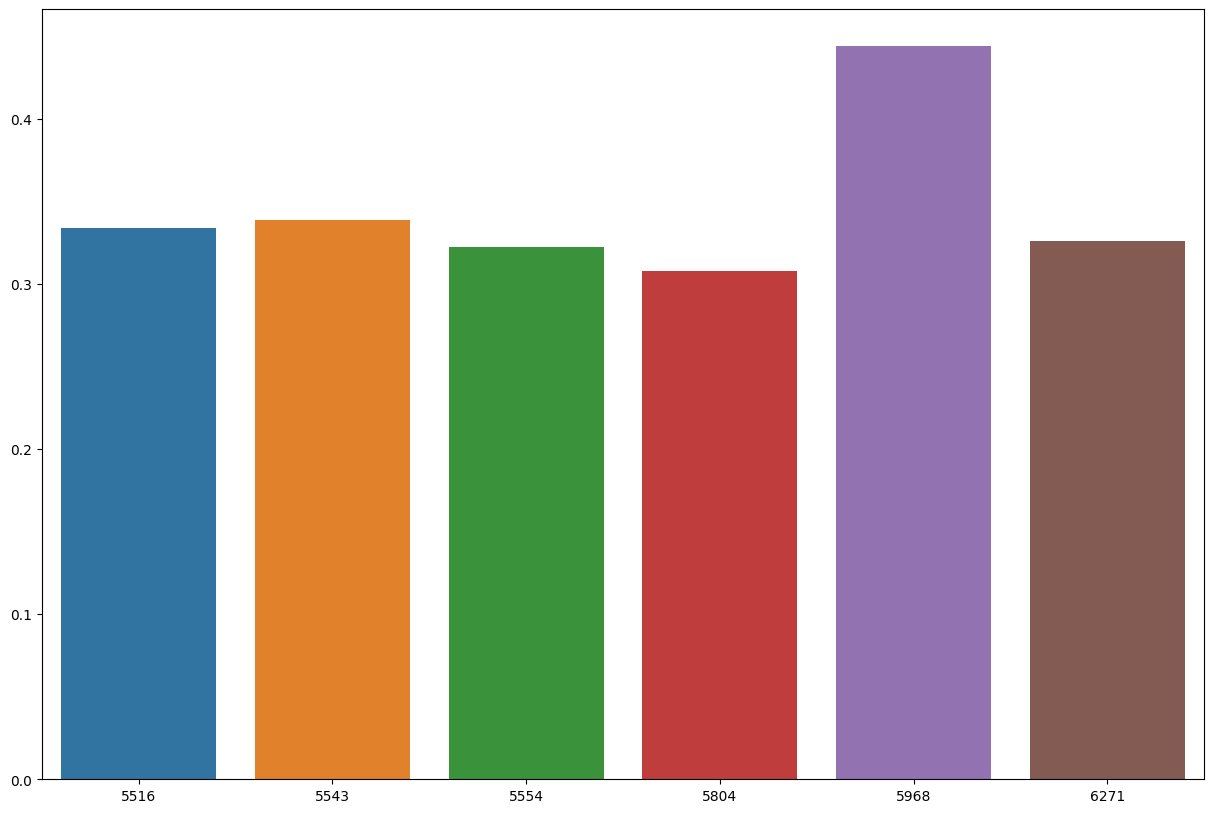

In [38]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in clos.items():
    if value > 0.3: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

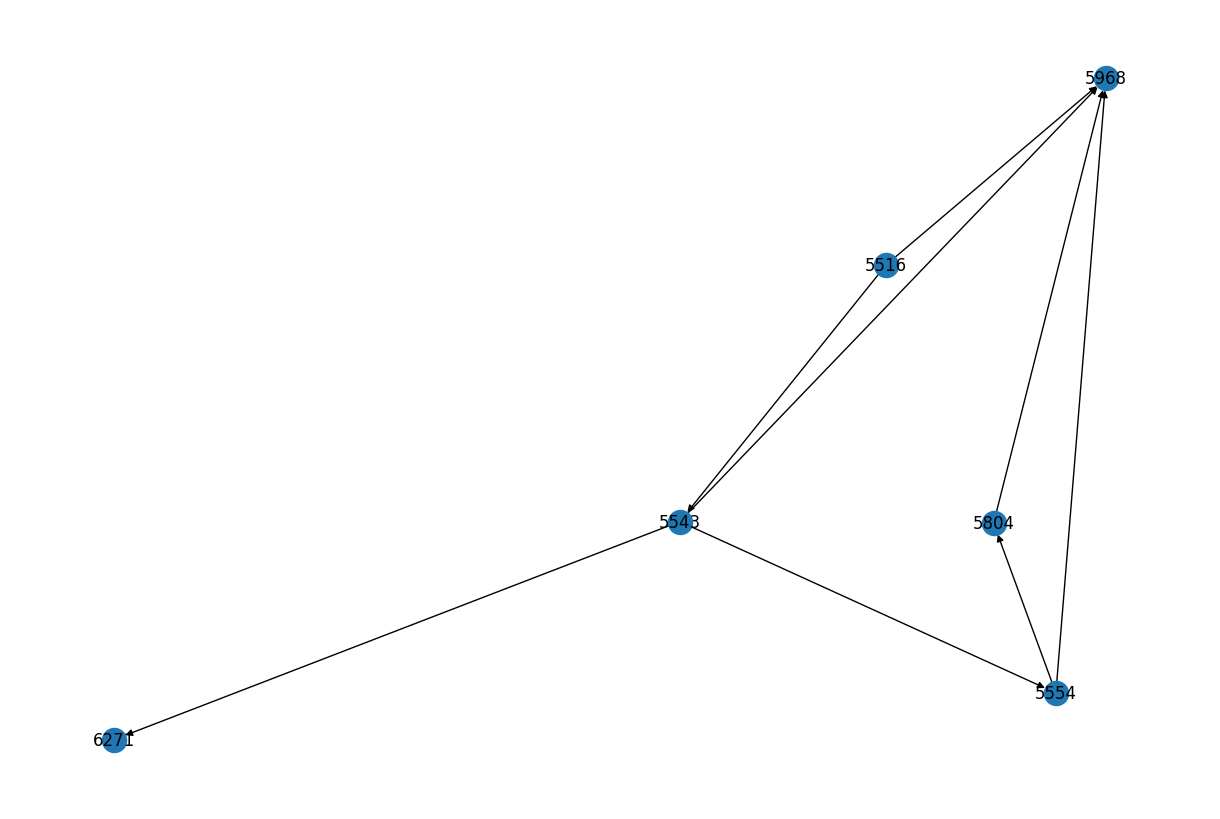

In [17]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_clos = nx.DiGraph()
graph_clos.add_edges_from(edges)
graph_clos.add_nodes_from(nodes)
pos_clos = nx.spring_layout(graph_clos)

plt.figure(figsize=(12,8))
nx.draw(graph_clos, pos_clos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_clos, pos_clos, labels)
plt.show()

Eigenvector Centrality

C:\Users\simod\AppData\Local\Temp\ipykernel_10768\1087020798.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=True)


<AxesSubplot:ylabel='Density'>

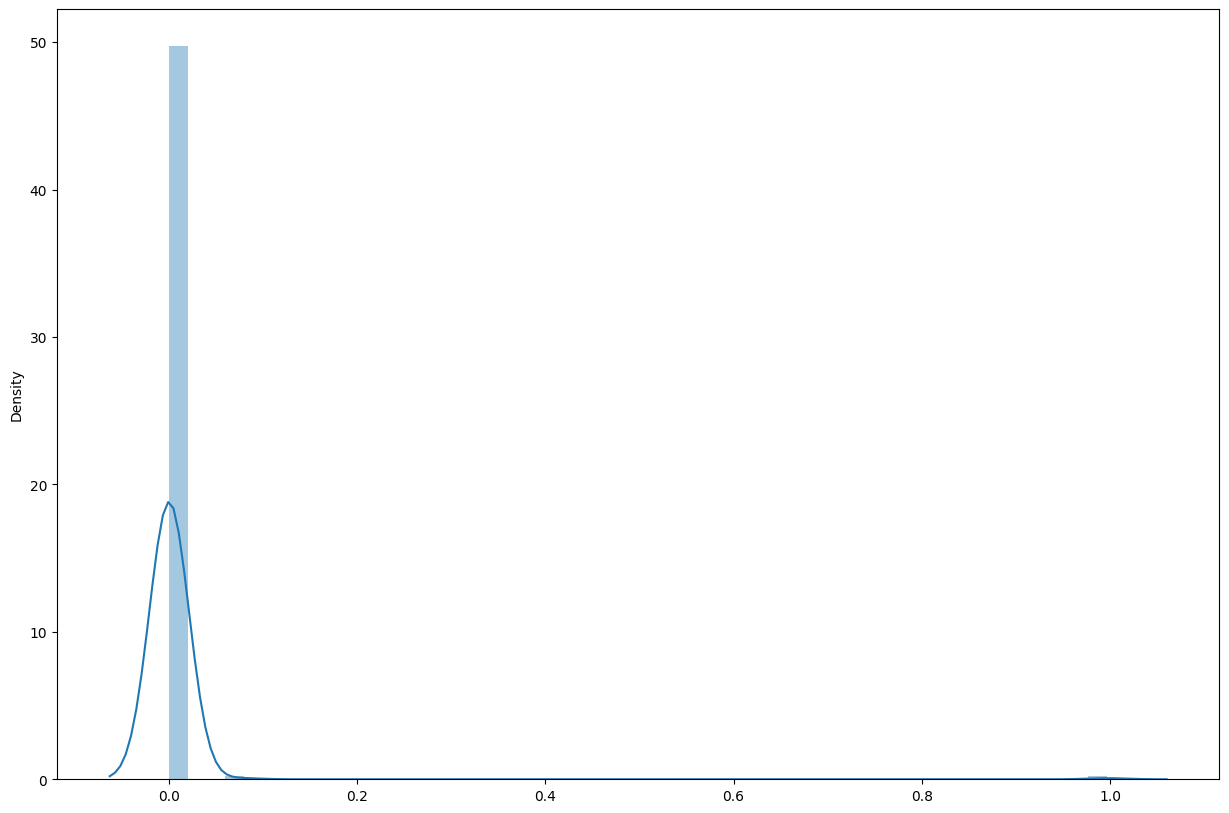

In [18]:
eigv = nx.eigenvector_centrality(graph, max_iter = 1000)
plt.figure(figsize=(15,10))
sns.distplot(list(eigv.values()), kde=True)

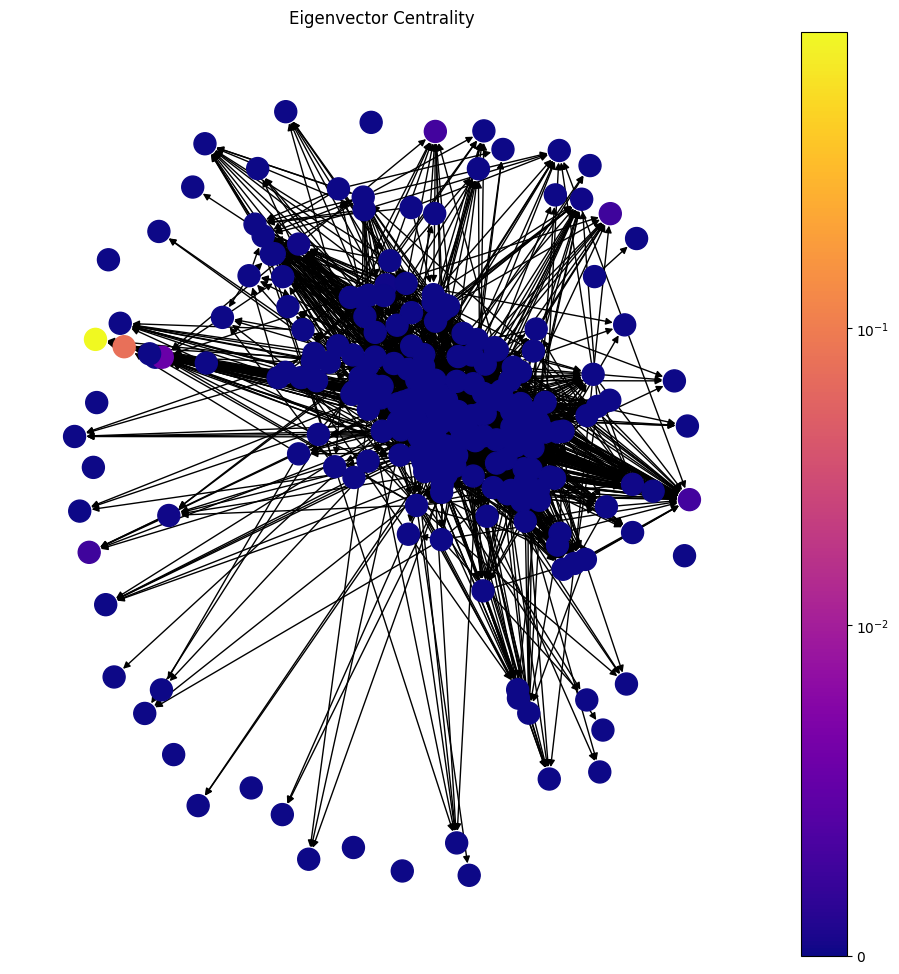

In [26]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

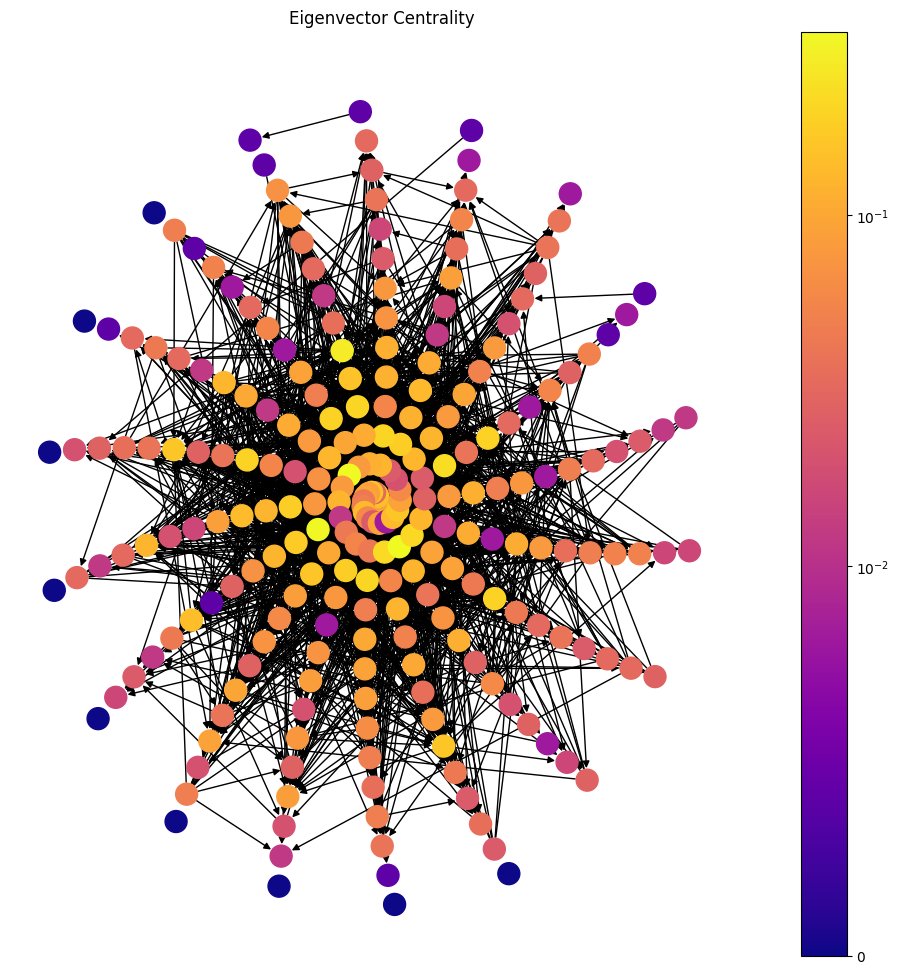

In [27]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Eigenvector Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{5968: Text(-0.5014344998641815, -0.5255416086857954, '5968'),
 5989: Text(0.9325543227229661, -0.2751036242915988, '5989'),
 3948: Text(0.5124234147846578, 0.45963611827984396, '3948'),
 5652: Text(-0.07762643021245809, 0.7503124740884902, '5652'),
 4805: Text(-0.5607155034245741, 0.4709721595593026, '4805'),
 5893: Text(0.4218567963421754, 0.360392243841656, '5893'),
 6427: Text(0.6879043757933562, 0.6428953006007785, '6427')}

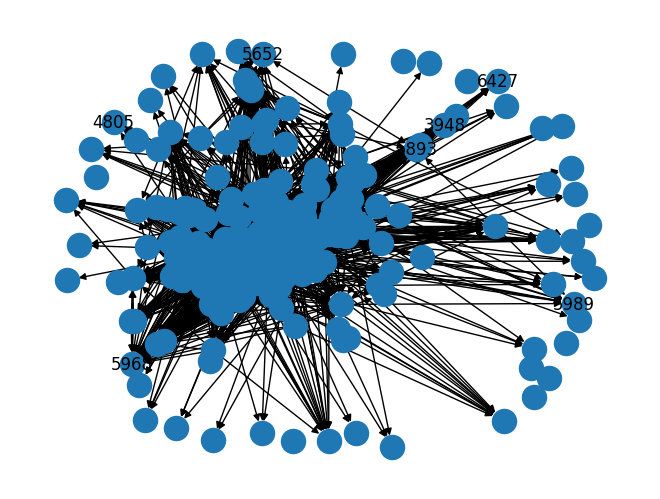

In [19]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in eigv.items():
    if value > 0.001: #faccio vedere solo le labels di nodi più importanti (0.01 è la scelta migliore, ma la visualizzazione del grafico che ne risulta non mi piace)
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

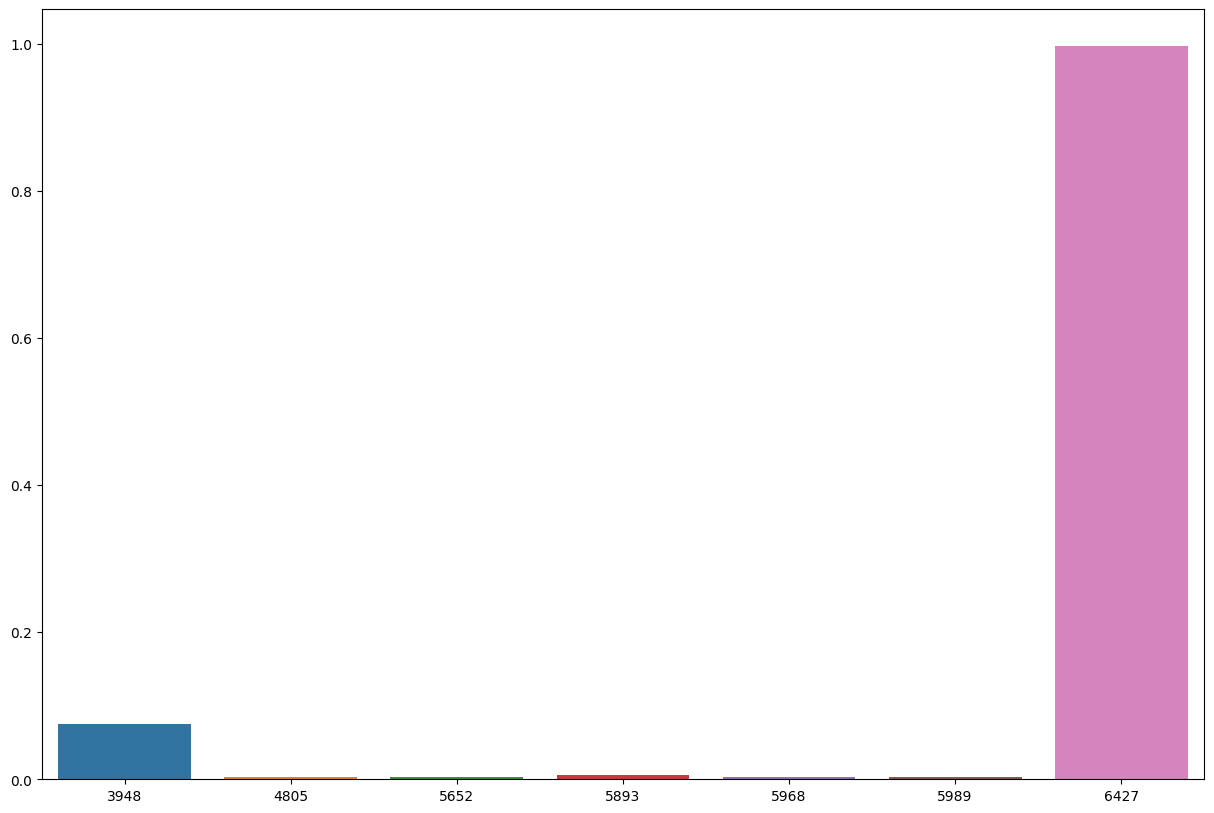

In [41]:
eigv = nx.eigenvector_centrality(graph, max_iter = 1000)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in eigv.items():
    if value > 0.001: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

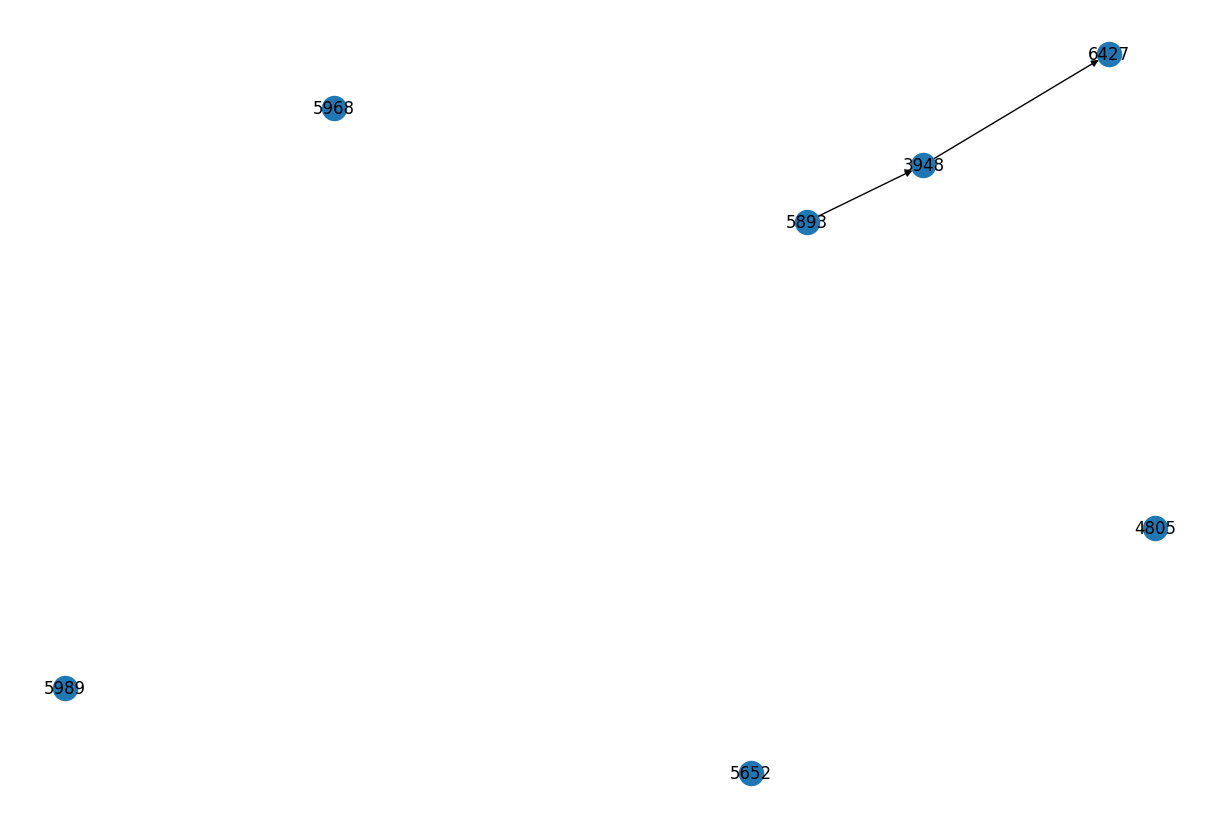

In [20]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_eigv = nx.DiGraph()
graph_eigv.add_edges_from(edges)
graph_eigv.add_nodes_from(nodes)
pos_eigv = nx.spring_layout(graph_eigv)

plt.figure(figsize=(12,8))
nx.draw(graph_eigv, pos_eigv, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_eigv, pos_eigv, labels)
plt.show()

PageRank

<Figure size 1500x1000 with 0 Axes>

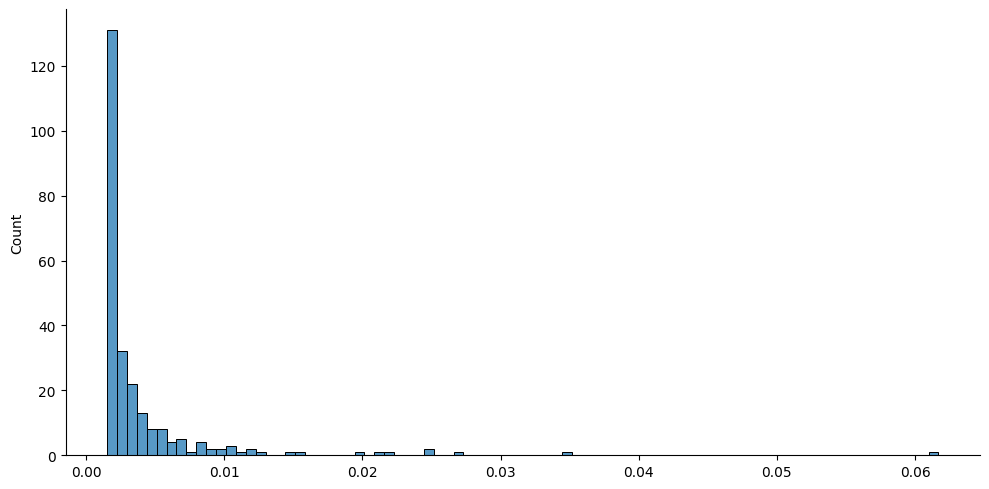

In [21]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.displot(list(pager.values()), kde=False, aspect = 2)

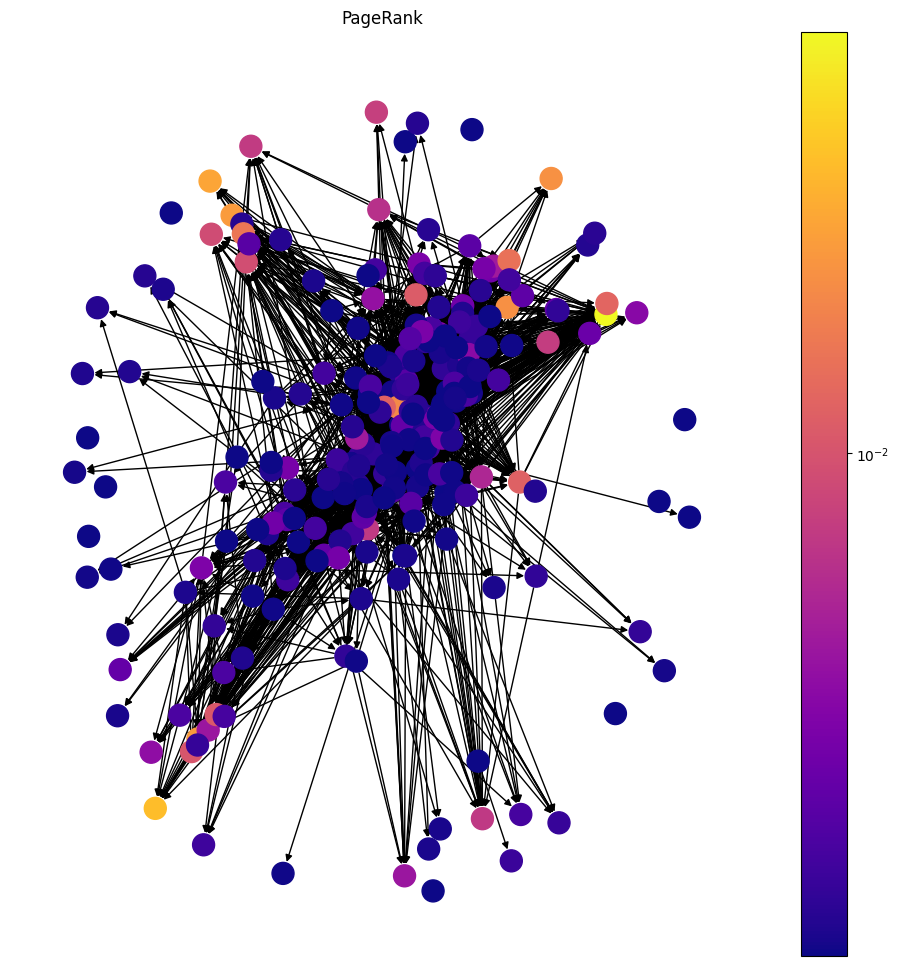

In [31]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, pager, 'PageRank')

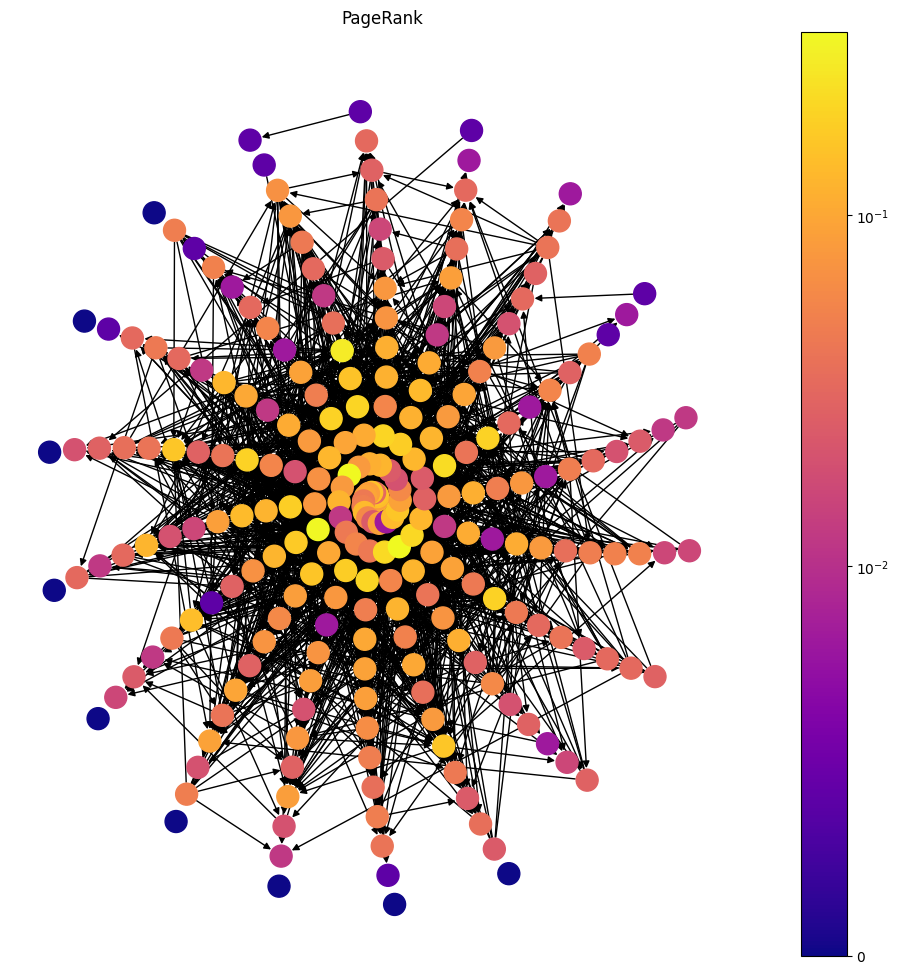

In [32]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'PageRank') # in questa forma non si riescono ad ottenere informazioni importanti

{5968: Text(-0.5458310507740443, -0.7984860497487996, '5968'),
 5516: Text(0.1677670016958934, -0.27063012009598725, '5516'),
 6271: Text(-0.6682006457625554, 0.6991665449611187, '6271'),
 3948: Text(0.8592951429407245, 0.30272256623860394, '3948'),
 6403: Text(-0.7078854881631569, 0.7398923422544134, '6403'),
 6427: Text(0.884422873384829, 0.3011276113499975, '6427'),
 5892: Text(0.943814151219573, 0.2126162031839947, '5892')}

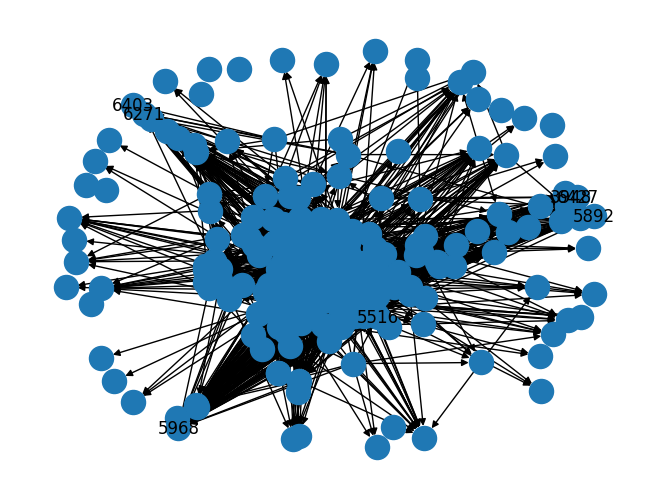

In [22]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in pager.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

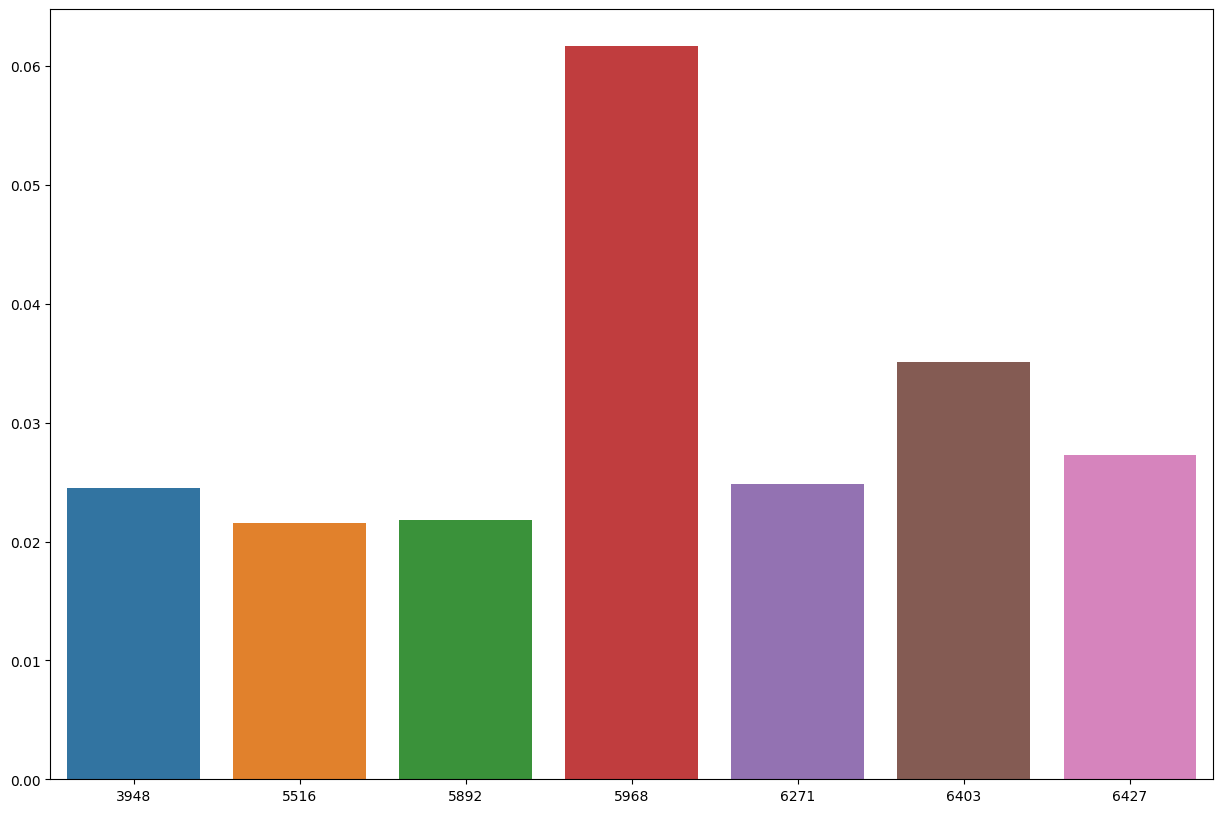

In [34]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in pager.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

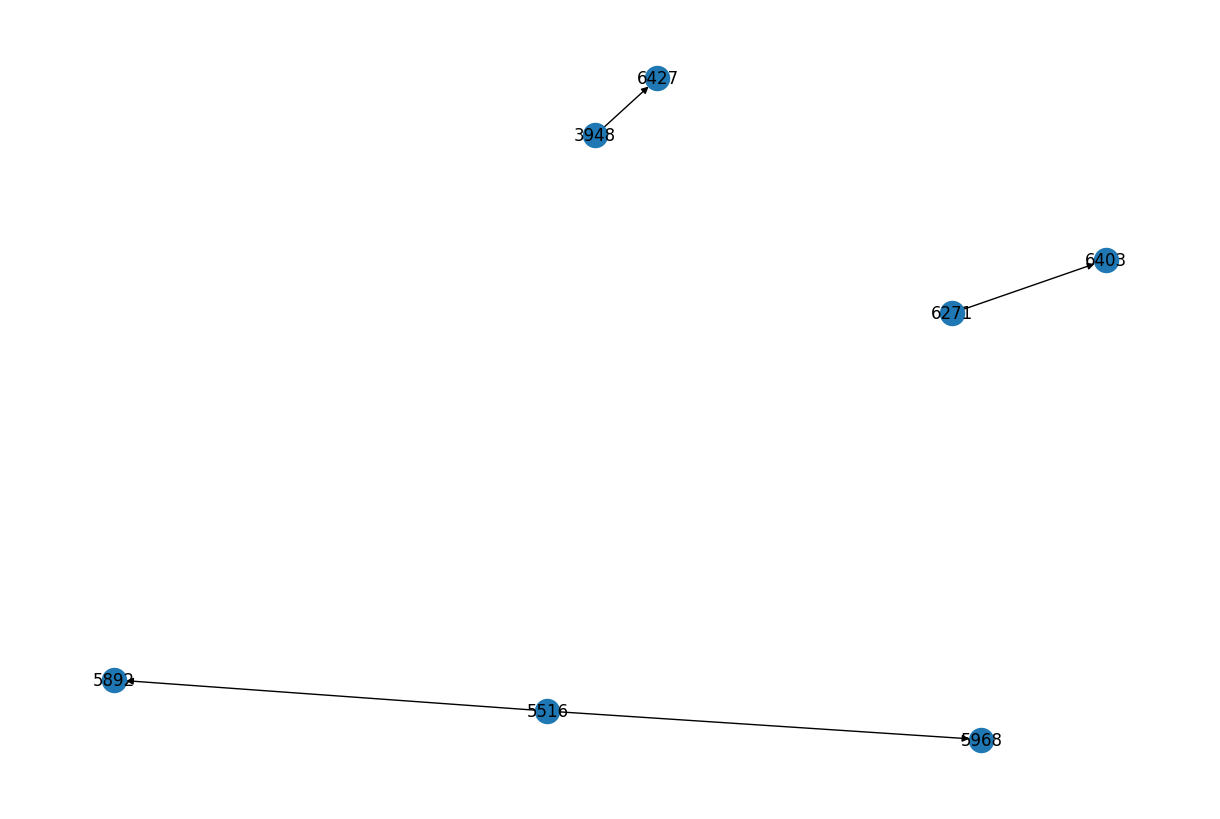

In [23]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_pager = nx.DiGraph()
graph_pager.add_edges_from(edges)
graph_pager.add_nodes_from(nodes)
pos_pager = nx.spring_layout(graph_pager)

plt.figure(figsize=(12,8))
nx.draw(graph_pager, pos_pager, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_pager, pos_pager, labels)
plt.show()

### Analisi delle strutture

Communites

In [24]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)
communities

[frozenset({183,
            246,
            347,
            420,
            479,
            539,
            771,
            938,
            995,
            1025,
            1057,
            1072,
            1115,
            1134,
            1349,
            1386,
            1430,
            1552,
            1748,
            1872,
            1931,
            1983,
            2015,
            2043,
            2119,
            2234,
            2298,
            2363,
            2367,
            2374,
            2438,
            2442,
            2459,
            2560,
            2569,
            2645,
            2671,
            2738,
            2880,
            2993,
            3259,
            3276,
            3356,
            3550,
            3552,
            3680,
            3803,
            3846,
            3857,
            3868,
            3883,
            3935,
            4009,
            4066,
            4105,
            4122,
 

In [25]:
len(communities)

15

In [26]:
def caricamento(nodes):
    edges = []
    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))
    return edges

def grafo(nodes, edges):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.spring_layout(graph)
    return graph

def visualizza(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos)

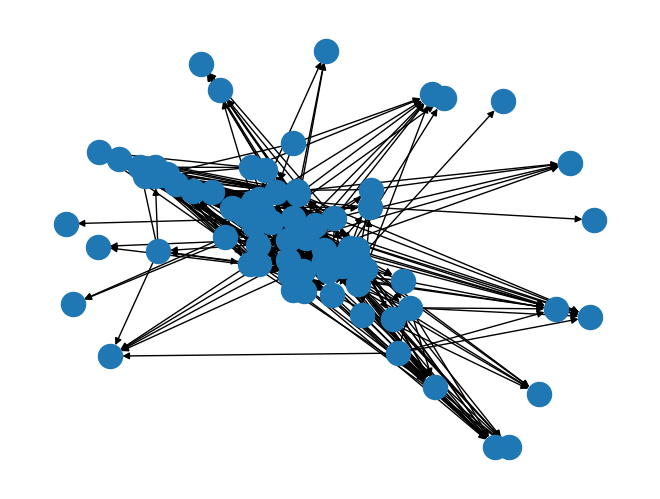

In [27]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[0])
graph_comm1 = grafo(communities[0], edges)
visualizza(graph_comm1)

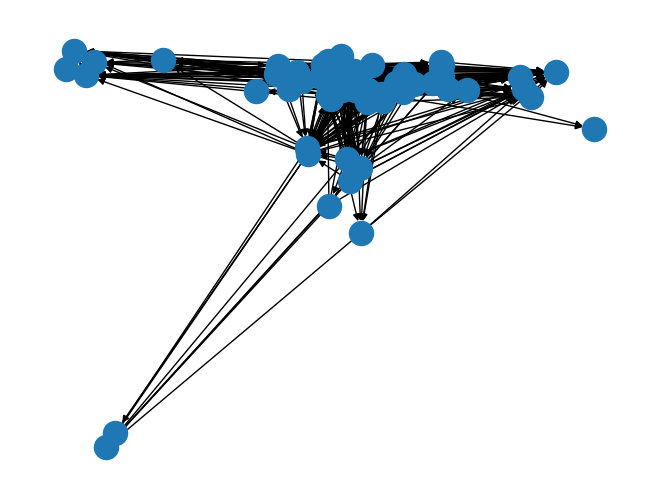

In [28]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[1])
graph_comm2 = grafo(communities[1], edges)
visualizza(graph_comm2)

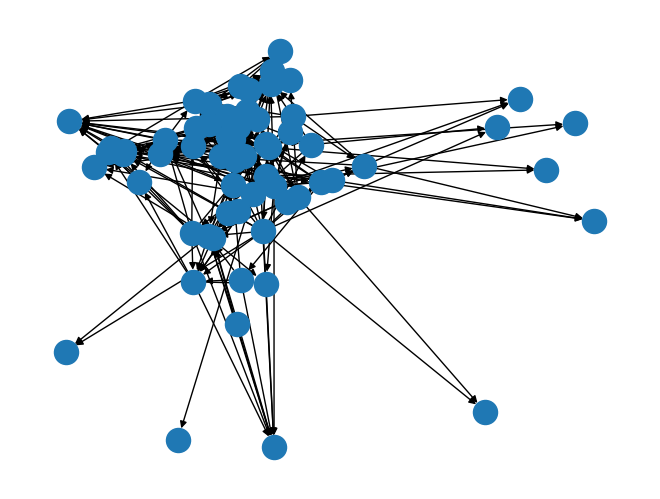

In [29]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[2])
graph_comm3 = grafo(communities[2], edges)
visualizza(graph_comm3)

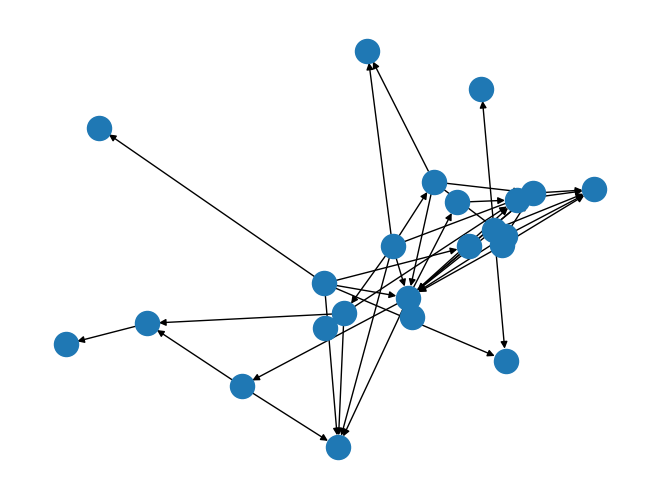

In [30]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[3])
graph_comm4 = grafo(communities[3], edges)
visualizza(graph_comm4)

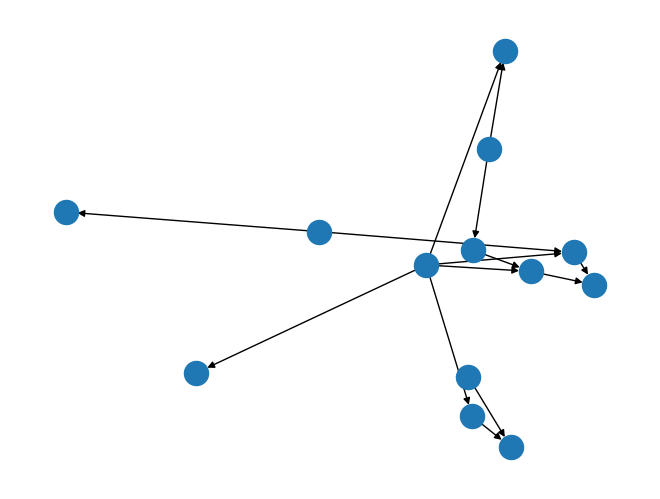

In [31]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[4])
graph_comm5 = grafo(communities[4], edges)
visualizza(graph_comm5)

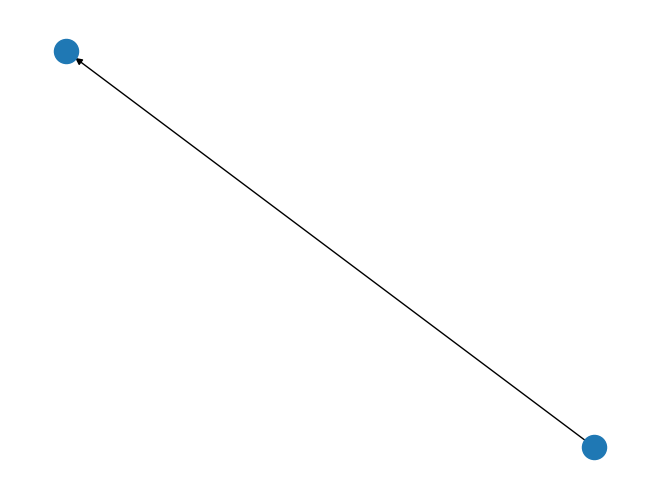

In [32]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[5])
graph_comm6 = grafo(communities[5], edges)
visualizza(graph_comm6)